# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Getting data

In [2]:
data = pd.read_csv('train_v9rqX0R.csv')

In [3]:
df = data.copy()

# Exploring data

In [4]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [8]:
df.select_dtypes(object).describe()

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

In [9]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [10]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

<AxesSubplot:>

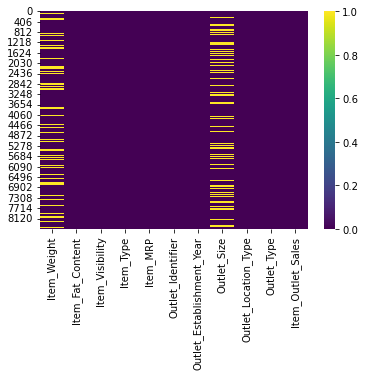

In [11]:
sns.heatmap(df.isnull(), cmap='viridis')

In [12]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Exploring data for treating Item_weight

In [13]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [14]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

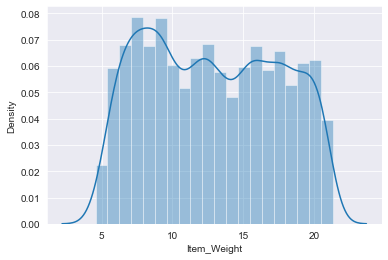

In [15]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

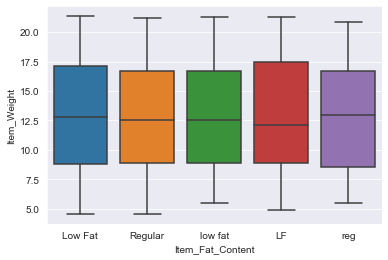

In [16]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

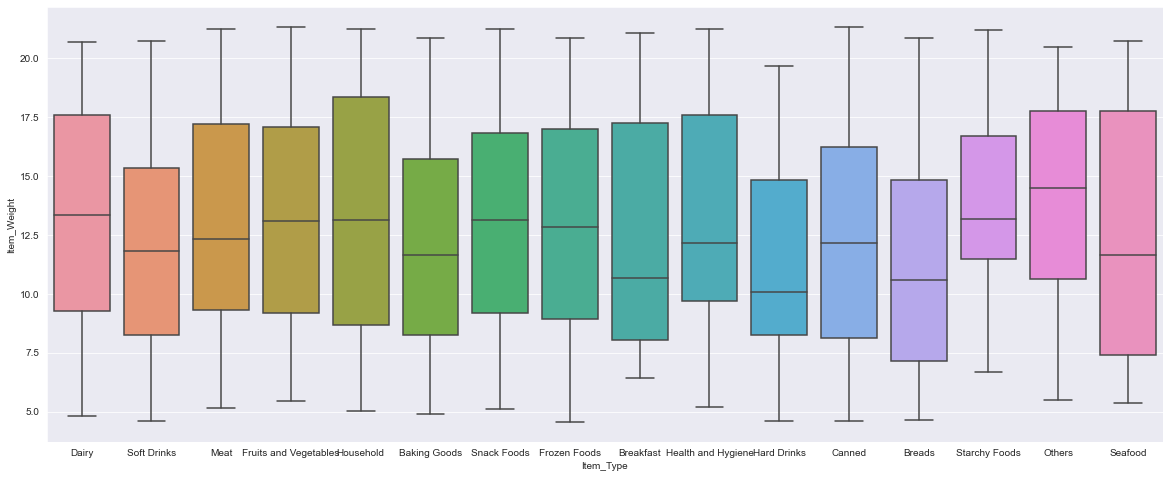

In [17]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Item_Type', y='Item_Weight')

In [18]:
df_Item_Weight = pd.DataFrame(round(df.groupby(by='Item_Type').mean()['Item_Weight'],2))

In [19]:
df_Item_Weight.reset_index(inplace=True)

In [20]:
df_Item_Weight

Item_Type  Item_Weight
0            Baking Goods        12.28
1                  Breads        11.35
2               Breakfast        12.77
3                  Canned        12.31
4                   Dairy        13.43
5            Frozen Foods        12.87
6   Fruits and Vegetables        13.22
7             Hard Drinks        11.40
8      Health and Hygiene        13.14
9               Household        13.38
10                   Meat        12.82
11                 Others        13.85
12                Seafood        12.55
13            Snack Foods        12.99
14            Soft Drinks        11.85
15          Starchy Foods        13.69

In [21]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i, 'Item_Weight']):
        item_type = df.loc[i, 'Item_Type']
        df.at[i, 'Item_Weight'] = df_Item_Weight[df_Item_Weight['Item_Type'] == item_type]['Item_Weight'].values

In [22]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Exploring data for Treating Outlet_Size

In [23]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

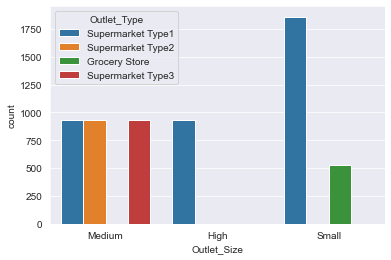

In [25]:
sns.countplot('Outlet_Size', data=df, hue='Outlet_Type')

In [26]:
df[df['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [27]:
df[df['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].value_counts()

Medium    928
Name: Outlet_Size, dtype: int64

In [28]:
df[df['Outlet_Type']=='Supermarket Type3']['Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [29]:
df[df['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

From above it is evident that Outlets of type 'Supermarket Type2', 'Supermarket Type3','Grocery Store' can be replaced with Medium, Medium and Small Outlet size respectively

In [30]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i, 'Outlet_Size']):
        if df.loc[i, 'Outlet_Type'] == 'Supermarket Type2':
            df.at[i, 'Outlet_Size'] = 'Medium'
        if df.loc[i, 'Outlet_Type'] == 'Supermarket Type3':
            df.at[i, 'Outlet_Size'] = 'Medium'
        if df.loc[i, 'Outlet_Type'] == 'Grocery Store':
            df.at[i, 'Outlet_Size'] = 'Small'

In [31]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1855
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
df[pd.isnull(df['Outlet_Size'])]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Name: Outlet_Type, dtype: int64

In [33]:
df[df['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [34]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i, 'Outlet_Size']):
        if df.loc[i, 'Outlet_Location_Type'] == 'Tier 2':
            df.at[i, 'Outlet_Size'] = 'Small'

In [35]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

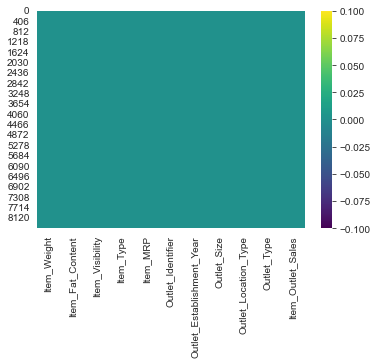

In [36]:
sns.heatmap(df.isnull(), cmap='viridis')

# EDA

In [37]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998       Small   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

In [38]:
categ_cols = df.select_dtypes(object).columns.to_list()

for col in categ_cols:
    print(col)
    print(df[col].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Outlet_Size
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    

In [39]:
df['Item_Fat_Content'].replace(to_replace=['LF', 'low fat'], value='Low Fat',inplace=True)
df['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular',inplace=True)

In [40]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

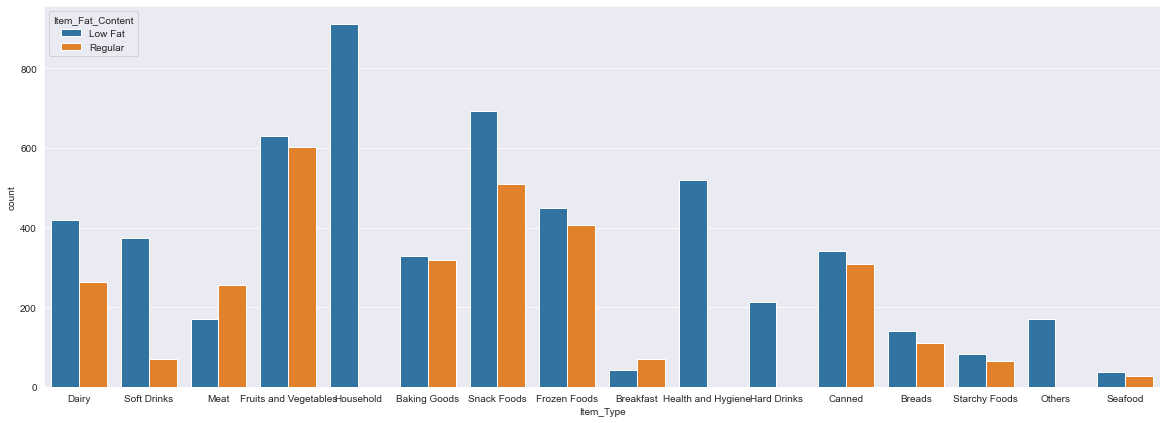

In [41]:
plt.figure(figsize = (20,7))
sns.countplot('Item_Type', data=df, hue='Item_Fat_Content')

<AxesSubplot:>

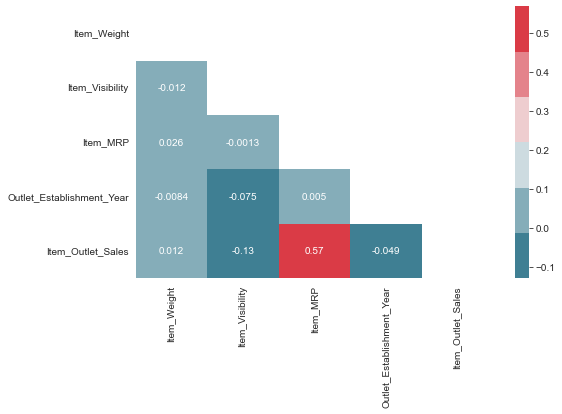

In [42]:
sns.set_style('white')
mask = np.triu(df.corr())
plt.figure(figsize=(8,5))
cmap = sns.diverging_palette(220, 10)
sns.heatmap(df.corr(), cmap=cmap, annot=True, mask=mask)

In [43]:
df.groupby(by='Outlet_Size').mean()['Item_Outlet_Sales']

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1867.182814
Name: Item_Outlet_Sales, dtype: float64

In [44]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Outlet_Size'>

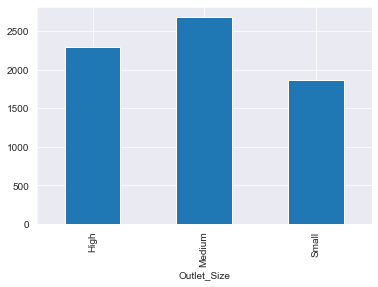

In [45]:
df.groupby(by='Outlet_Size').mean()['Item_Outlet_Sales'].plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Type'>

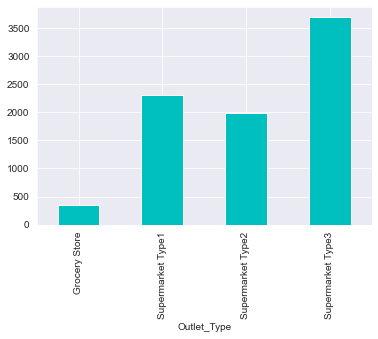

In [46]:
df.groupby(by='Outlet_Type').mean()['Item_Outlet_Sales'].plot(kind='bar', color='c')

<AxesSubplot:xlabel='Outlet_Location_Type'>

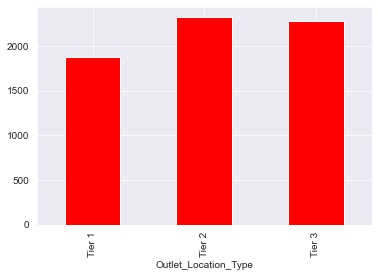

In [47]:
df.groupby(by='Outlet_Location_Type').mean()['Item_Outlet_Sales'].plot(kind='bar', color='r')

<AxesSubplot:xlabel='Outlet_Identifier'>

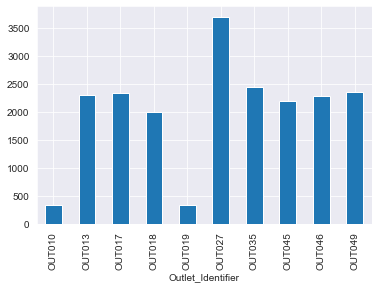

In [48]:
df.groupby(by='Outlet_Identifier').mean()['Item_Outlet_Sales'].plot(kind='bar')

<AxesSubplot:ylabel='Item_Type'>

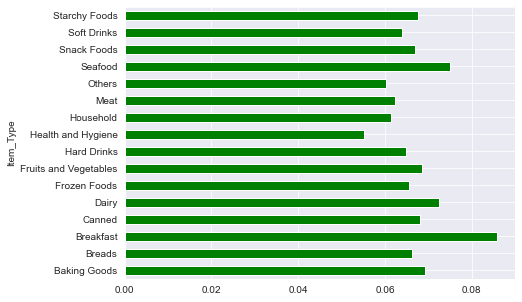

In [49]:
plt.figure(figsize=(7,5))
df.groupby(by='Item_Type').mean()['Item_Visibility'].plot(kind='barh', color='g')

# Removing Skewness

array([<AxesSubplot:title={'center':'Item_Weight'}>,
       <AxesSubplot:title={'center':'Item_Visibility'}>,
       <AxesSubplot:title={'center':'Item_MRP'}>,
       <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
       <AxesSubplot:title={'center':'Item_Outlet_Sales'}>], dtype=object)

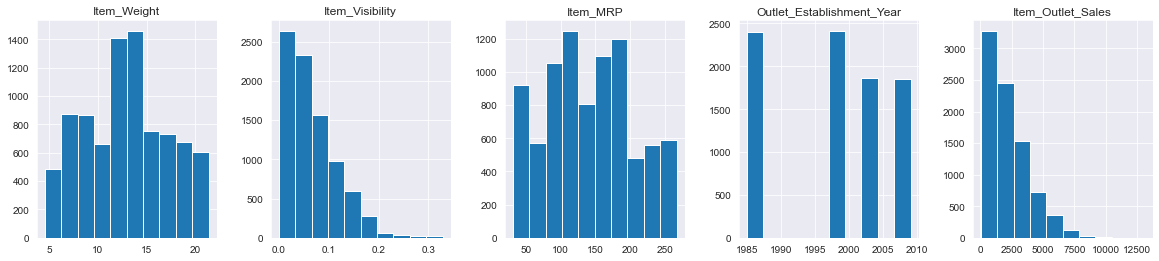

In [50]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
df.hist(ax=ax)

In [51]:
df.skew()[abs(df.skew().values) > 0.75]

Item_Visibility      1.167091
Item_Outlet_Sales    1.177531
dtype: float64

In [52]:
skewed_cols = df.skew()[abs(df.skew().values) > 0.75].index.to_list()

In [53]:
skewed_cols

['Item_Visibility', 'Item_Outlet_Sales']

In [54]:
for col in skewed_cols:
    print(col)
    print(df[col].apply(np.sqrt).skew())

Item_Visibility
-0.09805554671154018
Item_Outlet_Sales
0.23467599347099247


In [55]:
for col in skewed_cols:
    df[col] = df[col].apply(np.sqrt)

In [56]:
df.skew()[abs(df.skew().values) > 0.75]

Series([], dtype: float64)

array([<AxesSubplot:title={'center':'Item_Weight'}>,
       <AxesSubplot:title={'center':'Item_Visibility'}>,
       <AxesSubplot:title={'center':'Item_MRP'}>,
       <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
       <AxesSubplot:title={'center':'Item_Outlet_Sales'}>], dtype=object)

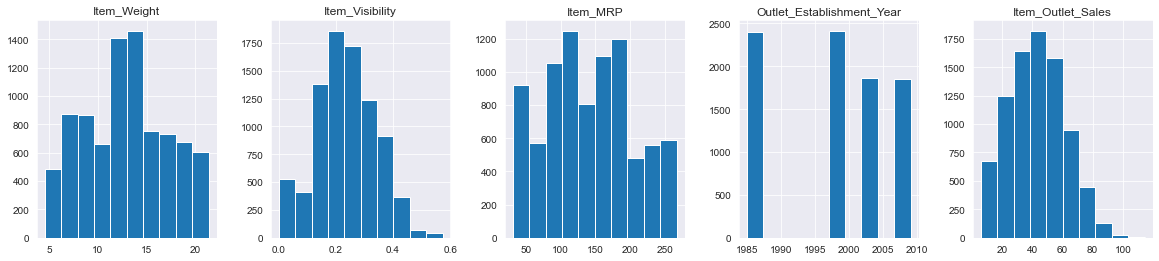

In [57]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
df.hist(ax=ax)

# Checking Outliers

In [58]:
num_cols = df.select_dtypes(np.number).columns.to_list()

In [59]:
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [60]:
for col in num_cols:
    q25, q50, q75 = np.percentile(df[col], [25,50,75])
    IQR = q75 - q25
    min_value = q25 - 1.5*(IQR)
    max_value = q75 + 1.5*(IQR)
    print(col)
    print([m for m in df[col] if m < min_value])
    print([n for n in df[col] if n > max_value])
    print(' ')

Item_Weight
[]
[]
 
Item_Visibility
[]
[0.5416804953106582, 0.5281799645954018, 0.5402456867018931, 0.5457872405983856, 0.5730540532968945, 0.5666701068523026, 0.5238369908664335, 0.5511291772352468, 0.543083063628392, 0.5329783100652409, 0.5562285995883347, 0.5267441323830765, 0.5521404748793554, 0.5402097888783579, 0.5460817447965094, 0.5707721147708602, 0.5226976468284509, 0.5551085011058648, 0.5413558284529686, 0.5389158719132329, 0.529306082526925, 0.5520302410194572, 0.5430919783977665, 0.535739806249265, 0.5499807914827571, 0.5351119957541598, 0.5380732598819606, 0.5447142966730357, 0.5525444751329978, 0.539850678428767, 0.5289456796307159, 0.5351240753320673, 0.5577547660038414, 0.5305747016207991, 0.5279494691729503, 0.553663117789148, 0.524015536983399, 0.5468983991565527, 0.5290434273289859, 0.5452638673156328]
 
Item_MRP
[]
[]
 
Outlet_Establishment_Year
[]
[]
 
Item_Outlet_Sales
[]
[96.27011997499535, 96.31160677716888, 101.17645477086059, 106.98178349607002, 96.8080616477

In [61]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.126678                  Dairy   
1         5.92          Regular         0.138846            Soft Drinks   
2        17.50          Low Fat         0.129461                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998       Small   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          61.115775  
1               Tier 3  Supermarket Type2          21.057607  
2               Tier 1  Supermarket Type1          45.795961  
3               Tier 3      Grocery Store          27.062520  
4               Tier 3  Supermarket Type1          31.538947

In [62]:
px.box(data_frame=df, y=['Item_Visibility'], width=700, height=500)

In [63]:
px.box(data_frame=df, y=['Item_Outlet_Sales'], width=700, height=500)

# Encoding categorical variables

In [64]:
df.select_dtypes(object)

Item_Fat_Content              Item_Type Outlet_Identifier Outlet_Size  \
0             Low Fat                  Dairy            OUT049      Medium   
1             Regular            Soft Drinks            OUT018      Medium   
2             Low Fat                   Meat            OUT049      Medium   
3             Regular  Fruits and Vegetables            OUT010       Small   
4             Low Fat              Household            OUT013        High   
...               ...                    ...               ...         ...   
8518          Low Fat            Snack Foods            OUT013        High   
8519          Regular           Baking Goods            OUT045       Small   
8520          Low Fat     Health and Hygiene            OUT035       Small   
8521          Regular            Snack Foods            OUT018      Medium   
8522          Low Fat            Soft Drinks            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  
0                  Tier 1  Supermarket Type1  
1                  Tier 3  Supermarket Type2  
2                  Tier 1  Supermarket Type1  
3                  Tier 3      Grocery Store  
4                  Tier 3  Supermarket Type1  
...                   ...                ...  
8518               Tier 3  Supermarket Type1  
8519               Tier 2  Supermarket Type1  
8520               Tier 2  Supermarket Type1  
8521               Tier 3  Supermarket Type2  
8522               Tier 1  Supermarket Type1  

[8523 rows x 6 columns]

In [65]:
categ_cols = df.select_dtypes(object).columns.to_list()

In [66]:
categ_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [67]:
categ_cols = set(categ_cols) - set(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

In [68]:
categ_cols = list(categ_cols)

In [69]:
df_categ = pd.get_dummies(df[categ_cols], drop_first=True)

In [70]:
df_categ

Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   
...                ...                  ...               ...   
8518                 0                    0                 0   
8519                 0                    0                 0   
8520                 0                    0                 0   
8521                 0                    0                 0   
8522                 0                    0                 0   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
0                   1                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
8518                0                       0   
8519                0                       0   
8520                0                       0   
8521                0                       0   
8522                0                       0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   1                      0   
4                                   0                      0   
...                               ...                    ...   
8518                                0                      0   
8519                                0                      0   
8520                                0                      0   
8521                                0                      0   
8522                                0                      0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  ...  \
0                                0                    0               0  ...   
1                                0                    0               0  ...   
2                                0                    0               1  ...   
3                                0                    0               0  ...   
4                                0                    1               0  ...   
...                            ...                  ...             ...  ...   
8518                             0                    0               0  ...   
8519                             0                    0               0  ...   
8520                             1                    0               0  ...   
8521                             0                    0               0  ...   
8522                             0                    0               0  ...   

      Outlet_Type_Supermarket Type3  Outlet_Identifier_OUT013  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         1   
...                             ...                       ...   
8518                              0                         1   
8519                              0                         0   
8520                              0                         0   
8521                              0                         0   
8522                              0                         0   

      Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                            0                         0   
1    

In [71]:
df['Item_Fat_Content'].replace(to_replace={'Low Fat': 1, 'Regular':2}, inplace=True)

In [72]:
df['Outlet_Size'].replace(to_replace={'Small':1, 'Medium':2, 'High':3}, inplace=True)

In [73]:
df['Outlet_Location_Type'].replace(to_replace={'Tier 1':1, 'Tier 2': 2, 'Tier 3':3}, inplace=True)

In [74]:
df1 = df.drop(categ_cols, axis=1)

In [75]:
df.head()

Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30                 1         0.126678                  Dairy   
1         5.92                 2         0.138846            Soft Drinks   
2        17.50                 1         0.129461                   Meat   
3        19.20                 2         0.000000  Fruits and Vegetables   
4         8.93                 1         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            2   
1   48.2692            OUT018                       2009            2   
2  141.6180            OUT049                       1999            2   
3  182.0950            OUT010                       1998            1   
4   53.8614            OUT013                       1987            3   

   Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0                     1  Supermarket Type1          61.115775  
1                     3  Supermarket Type2          21.057607  
2                     1  Supermarket Type1          45.795961  
3                     3      Grocery Store          27.062520  
4                     3  Supermarket Type1          31.538947

In [76]:
df1 = df.drop(categ_cols, axis=1)

In [77]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [78]:
df_coded = pd.concat([df_categ, df1], axis=1)

In [79]:
df_coded.head()

Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                 0                    0                 0                1   
1                 0                    0                 0                0   
2                 0                    0                 0                0   
3                 0                    0                 0                0   
4                 0                    0                 0                0   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                1   
4                       0                                0   

   Item_Type_Hard Drinks  Item_Type_Health and Hygiene  Item_Type_Household  \
0                      0                             0                    0   
1                      0                             0                    0   
2                      0                             0                    0   
3                      0                             0                    0   
4                      0                             0                    1   

   Item_Type_Meat  ...  Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  \
0               0  ...                         0                         1   
1               0  ...                         0                         0   
2               1  ...                         0                         1   
3               0  ...                         0                         0   
4               0  ...                         0                         0   

   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0         9.30                 1         0.126678  249.8092   
1         5.92                 2         0.138846   48.2692   
2        17.50                 1         0.129461  141.6180   
3        19.20                 2         0.000000  182.0950   
4         8.93                 1         0.000000   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            2                     1   
1                       2009            2                     3   
2                       1999            2                     1   
3                       1998            1                     3   
4                       1987            3                     3   

   Item_Outlet_Sales  
0          61.115775  
1          21.057607  
2          45.795961  
3          27.062520  
4          31.538947  

[5 rows x 35 columns]

In [80]:
df_coded.shape

(8523, 35)

In [81]:
X = df_coded.drop('Item_Outlet_Sales', axis=1)
y = df_coded['Item_Outlet_Sales']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()

In [86]:
X_train[num_cols] = sc_x.fit_transform(X_train[num_cols])

In [87]:
X_test[num_cols] = sc_x.transform(X_test[num_cols])

In [88]:
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

In [89]:
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

# Simple Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
regressor_lr = LinearRegression()

In [92]:
model_lr = regressor_lr.fit(X_train, y_train)

In [93]:
y_pred_lr_train = model_lr.predict(X_train)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
r2_score(y_train, y_pred_lr_train)

0.6605033738651184

In [96]:
np.sqrt(mean_squared_error(y_train, y_pred_lr_train))

0.09856497955279932

In [97]:
y_pred_lr_test = model_lr.predict(X_test)

In [98]:
r2_lr = r2_score(y_test, y_pred_lr_test)

In [99]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

In [100]:
res_lr = pd.DataFrame(y_test - y_pred_lr_test)

In [101]:
def plot_dist_residual(x):
    plt.figure(figsize=(7,5))
    sns.histplot(data=x, legend=False)
    plt.title(f'Distribution of residual')
    plt.text(0.4, 80, f"Skewness : {round(x[0].skew(),2)}", horizontalalignment='left', size='large', color='black')

In [102]:
def plot_residual_plot(x):
    sns.scatterplot(data=x, legend=False)
    plt.title('Residual plot')
    plt.text(2000, 0, 'No trend in plot', size='large')

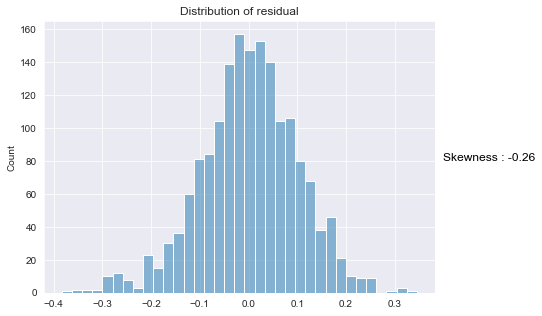

In [103]:
plot_dist_residual(res_lr)

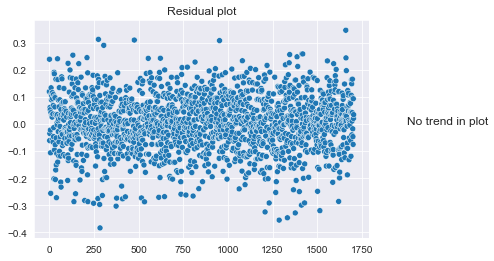

In [104]:
plot_residual_plot(res_lr)

# Lasso regression

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [106]:
kf = KFold(n_splits=6, shuffle=True)

In [107]:
estimator_lasso = Pipeline([('Polynomial_feature',PolynomialFeatures()),
                     ('Lasso_Regression',Lasso())])

In [108]:
alphas = np.geomspace(1e-10, 1e0, 10)

In [109]:
params = {
    'Polynomial_feature__degree':[1,2,3],
    'Lasso_Regression__alpha':alphas
}

In [110]:
grid = GridSearchCV(estimator_lasso, params, cv=kf,n_jobs=-1)

In [111]:
#grid.fit(X_train, y_train)

In [112]:
#grid.best_params_

In [113]:
#grid.best_score_

Results of GridSearchCV

Best params : 
lasso_reression_alpha =  0.0004641588833612782
polynomial_feature_degree = 3

Best_Score : 0.6718790466192582

In [114]:
#Training lasso reg model with best params

In [115]:
pf_3 = PolynomialFeatures(degree=3)

In [116]:
X_poly = pf_3.fit_transform(X_train)

In [117]:
lasso = Lasso(alpha=0.0004641588833612782, max_iter=1e5)

In [118]:
model_lasso = lasso.fit(X_poly, y_train)

In [119]:
y_pred_lasso_train = model_lasso.predict(pf_3.transform(X_train))

In [120]:
r2_score(y_train, y_pred_lasso_train)

0.6830446313194176

In [121]:
np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))

0.09523661722374013

In [122]:
y_pred_lasso_test = model_lasso.predict(pf_3.transform(X_test))

In [123]:
r2_lasso = r2_score(y_test, y_pred_lasso_test)

In [124]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

In [125]:
res_lasso = pd.DataFrame(y_test-y_pred_lasso_test.reshape(len(y_pred_lasso_test),1))

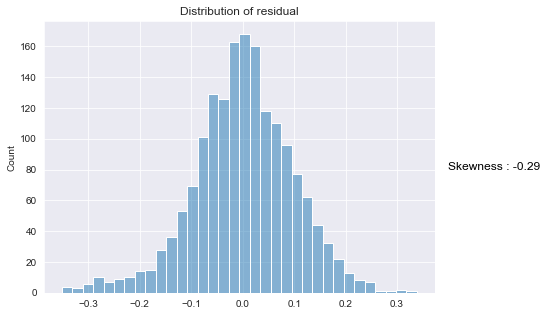

In [126]:
plot_dist_residual(res_lasso)

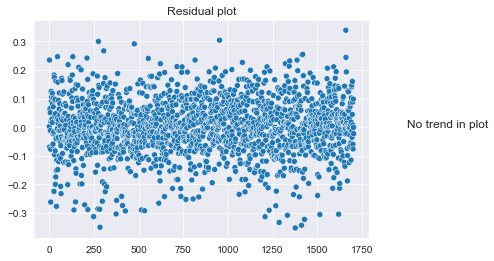

In [127]:
plot_residual_plot(res_lasso)

# Ridge regression model

In [128]:
estimator_Ridge = Pipeline([('Polynomial_feature', PolynomialFeatures()),
                           ('Ridge_regression', Ridge())])

In [129]:
alphas_ridge = np.geomspace(5,12,15)

In [130]:
params_ridge = {
    'Polynomial_feature__degree':[1,2],
    'Ridge_regression__alpha':alphas_ridge,
}

In [131]:
grid_ridge = GridSearchCV(estimator_Ridge, params_ridge, cv=kf)

In [132]:
#grid_ridge.fit(X_train, y_train)

In [133]:
#grid_ridge.best_params_

In [134]:
#grid_ridge.best_score_

Ridge grid results :

Best params:
'Polynomial_degree' = 2
'alpha' = 9.947350219136863

Best score:
0.67

In [135]:
ridge = Ridge(alpha=9.947350219136863)

In [136]:
pf_2 = PolynomialFeatures(degree=2)

In [137]:
X_poly = pf_2.fit_transform(X_train)

In [138]:
model_ridge = ridge.fit(X_poly, y_train)

In [139]:
y_pred_ridge_train = model_ridge.predict(X_poly)

In [140]:
r2_score(y_train, y_pred_ridge_train)

0.6929835605041643

In [141]:
np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))

0.09373153303317876

In [142]:
y_pred_ridge_test = model_ridge.predict(pf_2.transform(X_test))

In [143]:
r2_ridge = r2_score(y_test, y_pred_ridge_test)

In [144]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

In [145]:
res_ridge = pd.DataFrame(y_test-y_pred_ridge_test)

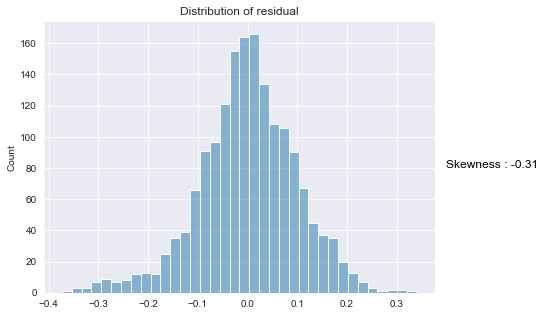

In [146]:
plot_dist_residual(res_ridge)

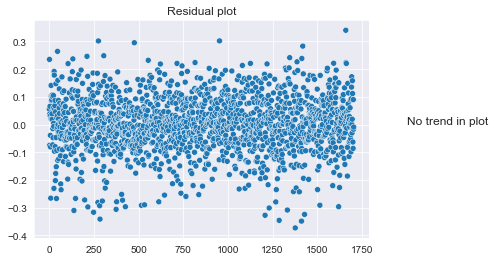

In [147]:
plot_residual_plot(res_ridge)

# Decision Tree model

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt = DecisionTreeRegressor()

In [150]:
model_1_dt = dt.fit(X_train, y_train)

In [151]:
y_pred_m1_dt_train = dt.predict(X_train)

In [152]:
r2_score(y_train, y_pred_m1_dt_train)

1.0

In [153]:
np.sqrt(mean_squared_error(y_train, y_pred_m1_dt_train))

2.911068143673411e-19

In [154]:
dt.tree_.max_depth

38

In [155]:
dt.tree_.node_count

13443

In [156]:
len(dt.feature_importances_)

34

In [157]:
param_dt = {
    'max_depth' : [6],
    'max_features' : [29,30],
    'min_samples_split':[30,40,45,50,55],
    'min_samples_leaf': [5,7,10,12,15]
}

In [158]:
grid_dt = GridSearchCV(DecisionTreeRegressor(),
                      param_grid=param_dt
              )

In [159]:
#grid_dt.fit(X_train, y_train)

In [160]:
#grid_dt.best_score_

In [161]:
#grid_dt.best_params_

grid_dt best score = 0.66


grid_dt best params :
max depth = 6
max_features = 30
min samples leaf = 15
min samples split = 50

In [162]:
dt = DecisionTreeRegressor(max_depth=6,
                          max_features=30,
                          min_samples_leaf=15,
                          min_samples_split=50)

In [163]:
model_dt = dt.fit(X_train,y_train)

In [164]:
y_pred_dt_train = model_dt.predict(X_train)

In [165]:
r2_score(y_train, y_pred_dt_train)

0.6836545804124627

In [166]:
np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

0.09514493639447032

In [167]:
y_pred_dt_test = model_dt.predict(X_test)

In [168]:
r2_dt = r2_score(y_test, y_pred_dt_test)

In [169]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

In [170]:
res_dt = pd.DataFrame(y_test-y_pred_dt_test.reshape(len(y_pred_dt_test),1))

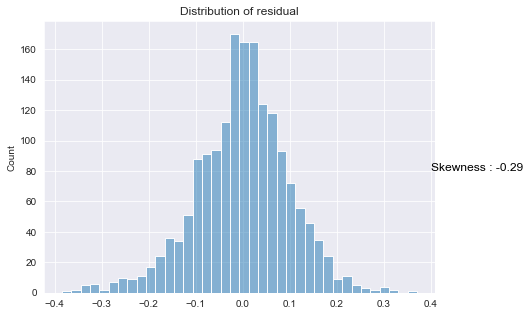

In [171]:
plot_dist_residual(res_dt)

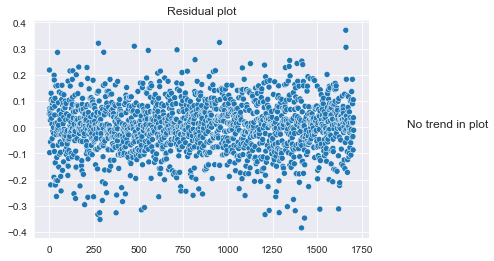

In [172]:
plot_residual_plot(res_dt)

# Random Forest model

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
estimator_rf = Pipeline([('rf', RandomForestRegressor())])

In [176]:
params = {
    'rf__n_estimators': [300,400,500,600,700,1000],
    'rf__max_depth': range(2,10),
    'rf__max_features': ['auto', 'sqrt'],
    'rf__min_samples_leaf': range(5,20),
    'rf__min_samples_split': range(10,50),
    'rf__bootstrap':[True, False]
}

In [177]:
rf_random = RandomizedSearchCV(estimator_rf, param_distributions=params, scoring='neg_mean_squared_error', n_jobs=-1)

In [178]:
#model_rf = rf_random.fit(X_train, y_train)

In [179]:
#model_rf.best_score_

In [180]:
#model_rf.best_params_

In [181]:
rf = RandomForestRegressor(n_estimators=500,
                          min_samples_leaf=18,
                          min_samples_split=37,
                          bootstrap=True,
                          max_depth=7)

In [182]:
model_rf = rf.fit(X_train, y_train)

In [183]:
y_pred_rf_train = model_rf.predict(X_train)

In [184]:
r2_score(y_train, y_pred_rf_train)

0.6983549586850208

In [185]:
np.sqrt(mean_squared_error(y_train, y_pred_rf_train))

0.09290797620266457

In [186]:
y_pred_rf_test = model_rf.predict(X_test)

In [187]:
r2_rf = r2_score(y_test, y_pred_rf_test)

In [188]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

In [189]:
res_rf = pd.DataFrame(y_test-y_pred_rf_test.reshape(len(y_pred_rf_test),1))

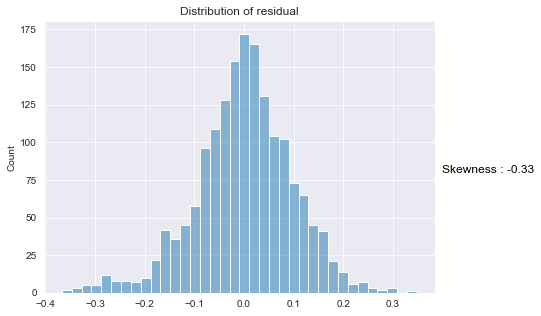

In [190]:
plot_dist_residual(res_rf)

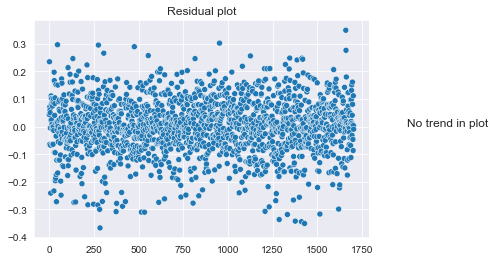

In [191]:
plot_residual_plot(res_rf)

# Comparing results

In [192]:
model_performance = pd.DataFrame(index=['LinearRegression', 'Lasso Regression', 'Ridge Regression', 'DecisionTree', 'RandomForest'])

In [193]:
model_performance['r2_score'] = [r2_lr, r2_lasso, r2_ridge, r2_dt, r2_rf]

In [194]:
model_performance['RMSE'] = [rmse_lr, rmse_lasso, rmse_ridge, rmse_dt, rmse_rf]

In [195]:
model_performance

r2_score      RMSE
LinearRegression  0.637366  0.101364
Lasso Regression  0.661089  0.097992
Ridge Regression  0.654479  0.098943
DecisionTree      0.643041  0.100568
RandomForest      0.657589  0.098497

# Preparing test data set for model

In [196]:
test_data = pd.read_csv('test_AbJTz2l (1).csv')

In [197]:
test_df = test_data.copy()

In [198]:
test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [199]:
test_df.drop('Item_Identifier', axis=1, inplace=True)

<AxesSubplot:>

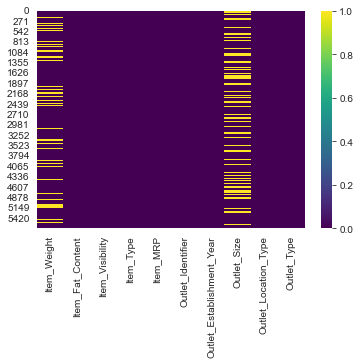

In [200]:
sns.heatmap(test_df.isnull(), cmap='viridis')

In [201]:
test_df_Item_Weight = pd.DataFrame(round(df.groupby(by='Item_Type').mean()['Item_Weight'],2))

test_df_Item_Weight.reset_index(inplace=True)

test_df_Item_Weight

Item_Type  Item_Weight
0            Baking Goods        12.28
1                  Breads        11.35
2               Breakfast        12.77
3                  Canned        12.31
4                   Dairy        13.43
5            Frozen Foods        12.87
6   Fruits and Vegetables        13.22
7             Hard Drinks        11.40
8      Health and Hygiene        13.14
9               Household        13.38
10                   Meat        12.82
11                 Others        13.85
12                Seafood        12.55
13            Snack Foods        12.99
14            Soft Drinks        11.85
15          Starchy Foods        13.69

In [202]:
for i in range(test_df.shape[0]):
    if pd.isnull(test_df.loc[i, 'Item_Weight']):
        item_type = test_df.loc[i, 'Item_Type']
        test_df.at[i, 'Item_Weight'] = test_df_Item_Weight[test_df_Item_Weight['Item_Type'] == item_type]['Item_Weight'].values

In [203]:
test_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [204]:
for i in range(test_df.shape[0]):
    if pd.isnull(test_df.loc[i, 'Outlet_Size']):
        if test_df.loc[i, 'Outlet_Type'] == 'Supermarket Type2':
            test_df.at[i, 'Outlet_Size'] = 'Medium'
        if test_df.loc[i, 'Outlet_Type'] == 'Supermarket Type3':
            test_df.at[i, 'Outlet_Size'] = 'Medium'
        if test_df.loc[i, 'Outlet_Type'] == 'Grocery Store':
            test_df.at[i, 'Outlet_Size'] = 'Small'

In [205]:
test_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1236
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [206]:
for i in range(test_df.shape[0]):
    if pd.isnull(test_df.loc[i, 'Outlet_Size']):
        if test_df.loc[i, 'Outlet_Location_Type'] == 'Tier 2':
            test_df.at[i, 'Outlet_Size'] = 'Small'

<AxesSubplot:>

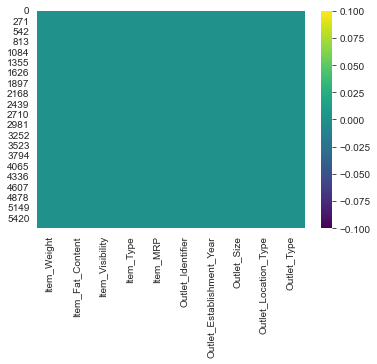

In [207]:
sns.heatmap(test_df.isnull(), cmap='viridis')

In [208]:
test_df['Item_Fat_Content'].replace(to_replace=['LF', 'low fat'], value='Low Fat',inplace=True)
test_df['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular',inplace=True)

In [209]:
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

array([<AxesSubplot:title={'center':'Item_Weight'}>,
       <AxesSubplot:title={'center':'Item_Visibility'}>,
       <AxesSubplot:title={'center':'Item_MRP'}>,
       <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
      dtype=object)

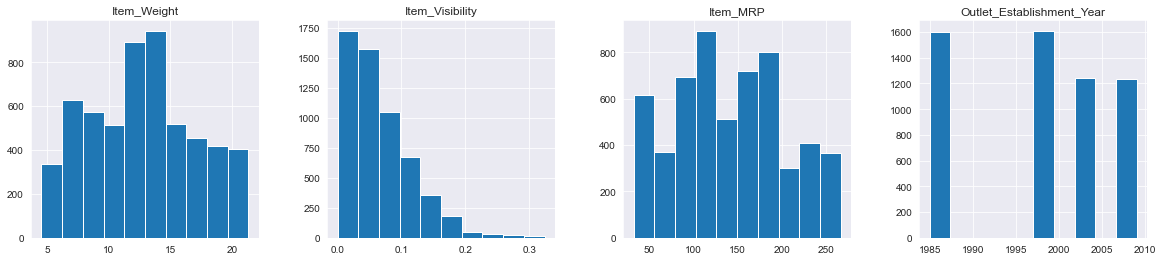

In [210]:
fig, ax = plt.subplots(1,4, figsize=(20,4))
test_df.hist(ax=ax)

In [211]:
test_df.skew()[abs(test_df.skew().values) > 0.75]

skewed_cols = test_df.skew()[abs(test_df.skew().values) > 0.75].index.to_list()

print(skewed_cols)

for col in skewed_cols:
    print(col)
    print(test_df[col].apply(np.sqrt).skew())

for col in skewed_cols:
    test_df[col] = test_df[col].apply(np.sqrt)

test_df.skew()[abs(test_df.skew().values) > 0.75]

['Item_Visibility']
Item_Visibility
-0.09494120775734813


Series([], dtype: float64)

array([<AxesSubplot:title={'center':'Item_Weight'}>,
       <AxesSubplot:title={'center':'Item_Visibility'}>,
       <AxesSubplot:title={'center':'Item_MRP'}>,
       <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
      dtype=object)

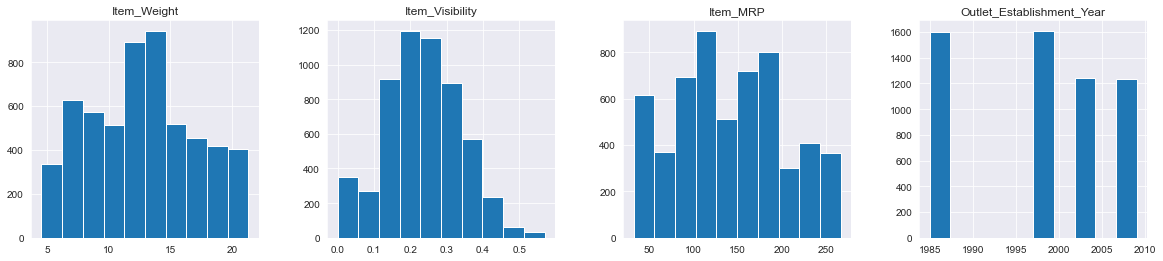

In [212]:
fig, ax = plt.subplots(1,4, figsize=(20,4))
test_df.hist(ax=ax)

In [213]:
categ_cols = test_df.select_dtypes(object).columns.to_list()

print(categ_cols)

categ_cols = set(categ_cols) - set(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

categ_cols = list(categ_cols)

test_df_categ = pd.get_dummies(test_df[categ_cols], drop_first=True)

test_df_categ

test_df['Item_Fat_Content'].replace(to_replace={'Low Fat': 1, 'Regular':2}, inplace=True)

test_df['Outlet_Size'].replace(to_replace={'Small':1, 'Medium':2, 'High':3}, inplace=True)

test_df['Outlet_Location_Type'].replace(to_replace={'Tier 1':1, 'Tier 2': 2, 'Tier 3':3}, inplace=True)

test_df1 = test_df.drop(categ_cols, axis=1)

test_df.head()

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0       20.750                 1         0.086976  Snack Foods  107.8622   
1        8.300                 2         0.196030        Dairy   87.3198   
2       14.600                 1         0.315555       Others  241.7538   
3        7.315                 1         0.124050  Snack Foods  155.0340   
4       13.430                 2         0.344383        Dairy  234.2300   

  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0            OUT049                       1999            2   
1            OUT017                       2007            1   
2            OUT010                       1998            1   
3            OUT017                       2007            1   
4            OUT027                       1985            2   

   Outlet_Location_Type        Outlet_Type  
0                     1  Supermarket Type1  
1                     2  Supermarket Type1  
2                     3      Grocery Store  
3                     2  Supermarket Type1  
4                     3  Supermarket Type3

In [214]:
test_df1 = test_df.drop(categ_cols, axis=1)

num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

test_df_coded = pd.concat([test_df_categ, test_df1], axis=1)

test_df_coded.head()

Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                 0                    0                 0                0   
1                 0                    0                 0                1   
2                 0                    0                 0                0   
3                 0                    0                 0                0   
4                 0                    0                 0                1   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   Item_Type_Hard Drinks  Item_Type_Health and Hygiene  Item_Type_Household  \
0                      0                             0                    0   
1                      0                             0                    0   
2                      0                             0                    0   
3                      0                             0                    0   
4                      0                             0                    0   

   Item_Type_Meat  ...  Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0               0  ...                         0                         0   
1               0  ...                         0                         0   
2               0  ...                         0                         0   
3               0  ...                         0                         0   
4               0  ...                         0                         0   

   Outlet_Identifier_OUT049  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                         1       20.750                 1         0.086976   
1                         0        8.300                 2         0.196030   
2                         0       14.600                 1         0.315555   
3                         0        7.315                 1         0.124050   
4                         0       13.430                 2         0.344383   

   Item_MRP  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  
0  107.8622                       1999            2                     1  
1   87.3198                       2007            1                     2  
2  241.7538                       1998            1                     3  
3  155.0340                       2007            1                     2  
4  234.2300                       1985            2                     3  

[5 rows x 34 columns]

In [215]:
X_test = test_df_coded

In [216]:
X_test

Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   
...                ...                  ...               ...   
5676                 0                    0                 0   
5677                 0                    0                 0   
5678                 0                    0                 0   
5679                 0                    0                 1   
5680                 0                    0                 1   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
0                   0                       0   
1                   1                       0   
2                   0                       0   
3                   0                       0   
4                   1                       0   
...               ...                     ...   
5676                0                       0   
5677                0                       0   
5678                0                       0   
5679                0                       0   
5680                0                       0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
5676                                0                      0   
5677                                0                      0   
5678                                0                      0   
5679                                0                      0   
5680                                0                      0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  ...  \
0                                0                    0               0  ...   
1                                0                    0               0  ...   
2                                0                    0               0  ...   
3                                0                    0               0  ...   
4                                0                    0               0  ...   
...                            ...                  ...             ...  ...   
5676                             0                    0               0  ...   
5677                             0                    0               0  ...   
5678                             1                    0               0  ...   
5679                             0                    0               0  ...   
5680                             0                    0               0  ...   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5676                         0                         1   
5677                         0                         0   
5678                         1                         0   
5679                         0                         0   
5680                         1                         0   

      Outlet_Identifier_OUT049  Item_Weight  Item_Fat_Content  \
0                            1       20.750                 1   
1                            0        8.300            

In [217]:
X_test[num_cols] = sc_x.transform(X_test[num_cols])

In [218]:
X_test

Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   
...                ...                  ...               ...   
5676                 0                    0                 0   
5677                 0                    0                 0   
5678                 0                    0                 0   
5679                 0                    0                 1   
5680                 0                    0                 1   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
0                   0                       0   
1                   1                       0   
2                   0                       0   
3                   0                       0   
4                   1                       0   
...               ...                     ...   
5676                0                       0   
5677                0                       0   
5678                0                       0   
5679                0                       0   
5680                0                       0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
5676                                0                      0   
5677                                0                      0   
5678                                0                      0   
5679                                0                      0   
5680                                0                      0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  ...  \
0                                0                    0               0  ...   
1                                0                    0               0  ...   
2                                0                    0               0  ...   
3                                0                    0               0  ...   
4                                0                    0               0  ...   
...                            ...                  ...             ...  ...   
5676                             0                    0               0  ...   
5677                             0                    0               0  ...   
5678                             1                    0               0  ...   
5679                             0                    0               0  ...   
5680                             0                    0               0  ...   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5676                         0                         1   
5677                         0                         0   
5678                         1                         0   
5679                         0                         0   
5680                         1                         0   

      Outlet_Identifier_OUT049  Item_Weight  Item_Fat_Content  \
0                            1     0.964275                 1   
1                            0     0.222983            

# Predictions with different models

# Simple Linear Regression

In [219]:
y_pred_lr_test = model_lr.predict(X_test)

In [220]:
y_pred_lr_test

array([[0.32281494],
       [0.28442383],
       [0.24987793],
       ...,
       [0.32141113],
       [0.49914551],
       [0.26245117]])

In [221]:
y_pred_lr_test = sc_y.inverse_transform(y_pred_lr_test)

In [222]:
y_pred_lr_test

array([[40.83665931],
       [36.66628934],
       [32.91361938],
       ...,
       [40.68416566],
       [59.99118848],
       [34.27943212]])

In [223]:
y_pred_lr_test = np.square(y_pred_lr_test)

In [224]:
y_pred_lr_test = pd.DataFrame(y_pred_lr_test)

In [225]:
#y_pred_lr_test.to_csv('lr test.csv')

# Lasso regression

In [226]:
y_pred_lasso_test = model_lasso.predict(pf_3.transform(X_test))

In [227]:
y_pred_lasso_test

array([0.32017979, 0.28232063, 0.17473828, ..., 0.32444931, 0.49840449,
       0.26445396])

In [228]:
y_pred_lasso_test = sc_y.inverse_transform(np.array(y_pred_lasso_test).reshape(-1,1))

In [229]:
y_pred_lasso_test = np.square(y_pred_lasso_test)

In [230]:
y_pred_lasso_test = pd.DataFrame(y_pred_lasso_test)

In [231]:
#y_pred_lasso_test.to_csv('lasso test.csv')

# Ridge regression

In [232]:
y_pred_ridge_test = model_ridge.predict(pf_2.transform(X_test))

In [233]:
y_pred_ridge_test = sc_y.inverse_transform(np.array(y_pred_ridge_test).reshape(-1,1))

In [234]:
y_pred_ridge_test = np.square(y_pred_ridge_test)

In [235]:
y_pred_ridge_test = pd.DataFrame(y_pred_ridge_test)

In [236]:
#y_pred_ridge_test.to_csv('Ridge test.csv')

# Decision Tree

In [237]:
y_pred_dt_test = model_dt.predict(X_test)

In [238]:
y_pred_dt_test = sc_y.inverse_transform(np.array(y_pred_dt_test).reshape(-1,1))

In [239]:
y_pred_dt_test = np.square(y_pred_dt_test)

In [240]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)

In [241]:
#y_pred_dt_test.to_csv('dt test.csv')

# Random Forest

In [242]:
y_pred_rf_test = model_rf.predict(X_test)

In [243]:
y_pred_rf_test = sc_y.inverse_transform(np.array(y_pred_rf_test).reshape(-1,1))

In [244]:
y_pred_rf_test = np.square(y_pred_rf_test)

In [245]:
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)

In [246]:
#y_pred_rf_test.to_csv('rf test.csv')

# Comparing predictions

In [247]:
Final_result = pd.concat([y_pred_lr_test, y_pred_lasso_test, y_pred_ridge_test, y_pred_dt_test, y_pred_rf_test], axis=1)

In [248]:
Final_result.columns = ['LinearRegression', 'LassoRegression', 'RidgeRegression', 'DecisionTree', 'RandomForest']

In [249]:
Final_result

LinearRegression  LassoRegression  RidgeRegression  DecisionTree  \
0          1667.632744      1644.335487      1668.480509   1546.511229   
1          1344.416774      1327.714883      1399.765146   1268.368795   
2          1083.306341       612.627351       603.703537    579.879929   
3          2371.046975      2382.360395      2376.219172   2701.552187   
4          5334.745373      5846.883142      5894.838213   5955.458746   
...                ...              ...              ...           ...   
5676       2074.262509      2194.092719      2276.814836   2146.199934   
5677       2175.107557      2222.601629      2223.195562   2447.505200   
5678       1655.201335      1682.164438      1620.277161   1889.440493   
5679       3598.942695      3589.291170      3876.663848   3728.687403   
5680       1175.079467      1190.042483      1259.702970   1268.368795   

      RandomForest  
0      1597.114408  
1      1309.088107  
2       555.993840  
3      2334.056611  
4      6132.738648  
...            ...  
5676   2141.552884  
5677   2395.623379  
5678   1789.646868  
5679   3331.163955  
5680   1265.501457  

[5681 rows x 5 columns]

# ------------------------------------------------------------------------------------------------------------- 